<a href="https://colab.research.google.com/github/yohanesnuwara/numerical-method/blob/master/quantum-computing/quantum_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Install qiskit for quantum computing, more or less take 1.5 minute to install

In [0]:
!pip install qiskit

In [0]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## First quantum circuit (Measurement, Encoding Number to Bit to Qubit, NOT gate)

In [0]:
n = 8
n_q = 8 # number of qubits in the circuit
n_b = 8 # number of output bits we will extract from the circuit at the end
qc_output = QuantumCircuit(n_q,n_b)

Put measurement and visualize the circuit. "Measurement of nothing"

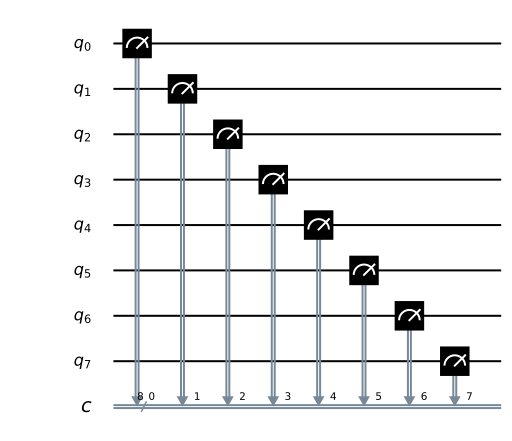

In [0]:
for j in range(n):
    qc_output.measure(j,j)
qc_output.draw(output='mpl')

"Measurement of nothing" results `00000000` with 100% probability

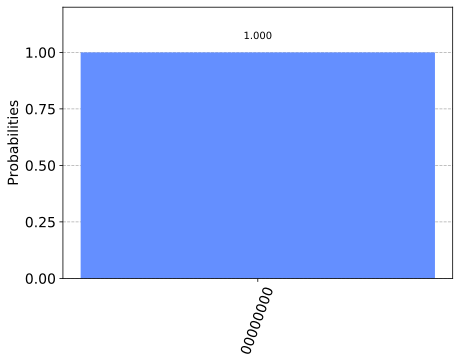

In [0]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Encoding an input. Create a NOT gate, `x`, which simply switch `0` to `1`, and otherwise. Number of qubits is still the same, 8 qubits

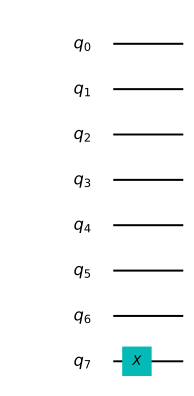

In [0]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw(output='mpl')

Adding the NOT gate into the previous measurement circuit (`qc_encode + qc_output`)

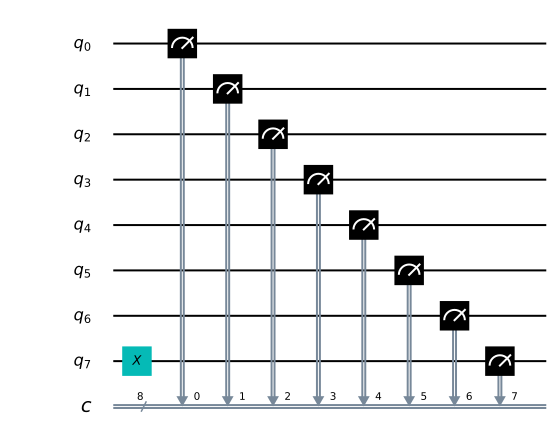

In [0]:
qc = qc_encode + qc_output
qc.draw(output='mpl',justify='none')

Result of measurement is `10000000` with 100% probability. Qubit 7 is `1`, simply this means we write number `128` in our simple 8-bit computer or circuit (how many $2^7$ s we have in our number).

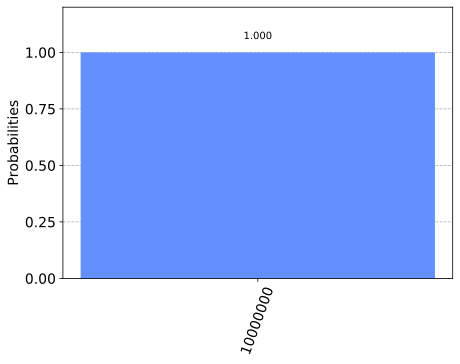

In [0]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Convert any number to a qubit representation. For example, `77`. First convert number to bit, then bit to qubit

In [0]:
# Function to print binary number using recursion
def convertToBinary(n):
   if n > 1:
       convertToBinary(n//2)
   print(n % 2,end = '')

# decimal number
dec = 77

convertToBinary(dec)
print()

1001101


Remember to represent bit to qubit in **reverse order**. `1001101` in bit means `1011001` in qubit, means we can represent by putting NOT gate in **qubit 0**, **qubit 2**, **qubit 3**, and **qubit 6** to change `000000` to `1011001`.

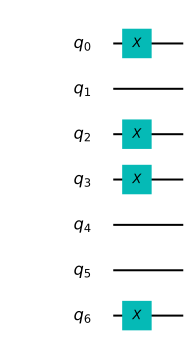

In [0]:
n = 7 # number of qubits

qc_encode = QuantumCircuit(n)
qc_encode.x(0)
qc_encode.x(2)
qc_encode.x(3)
qc_encode.x(6)

qc_encode.draw(output='mpl')

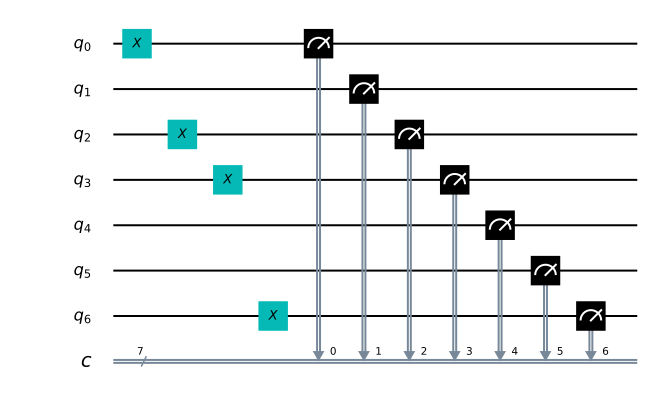

In [0]:
# circuit with measurements
n_q = 7 # number of qubits in the circuit
n_b = 7 # number of output bits we will extract from the circuit at the end
qc_output = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_output.measure(j,j)

# add not gate to measurement circuits
qc = qc_encode + qc_output
qc.draw(output='mpl',justify='none')

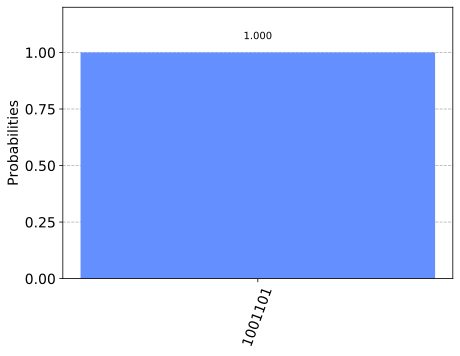

In [0]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

`1001101` which is just the number we want `77`

### Wrap it all up: make a full encoder to convert ordinal number to qubit.

Number 120 is represented in 7 bit: [1 1 1 1 0 0 0]
Quantum Circuit Diagram:


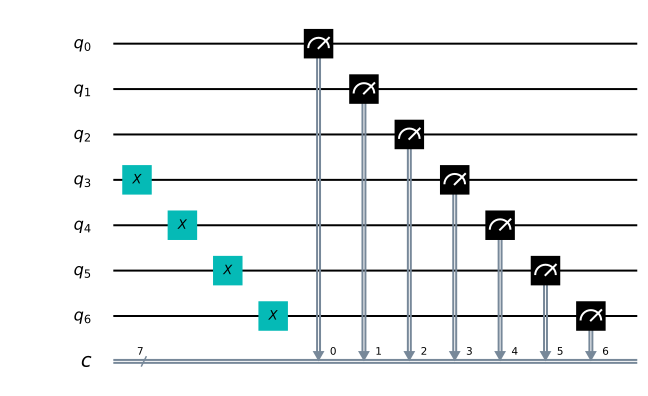

In [0]:
# input ordinal number
x = 120

# convert to bit
bit_array = np.array([int(d) for d in str(bin(x))[2:]])
print("Number", x, "is represented in", len(bit_array),"bit:", bit_array)

# reverse/flip order of bit to represent qubit
qbit_array = np.flip(bit_array)

# trace for ones 1 in the qubit
qbit_loc = np.int64(np.where(qbit_array==1)[0]) 

# calculate number of bits
n = len(qbit_array)

# create encoder (NOT gate) circuit
qc_encode = QuantumCircuit(n)

for j in range(len(qbit_loc)):
  qc_encode.x(qbit_loc[j])

# create measurement circuit
n_q = n # number of qubits in the circuit
n_b = n # number of output bits we will extract from the circuit at the end
qc_output = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_output.measure(j,j)

# add measurement circuit to encoder circuit
qc = qc_encode + qc_output
print("Quantum Circuit Diagram:")
qc.draw(output='mpl',justify='none')

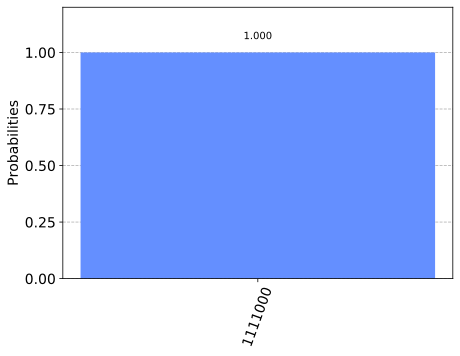

In [0]:
# plot result as histogram
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Text encoder

The text: hi represented in bit: [1 1 0 1 0 0 0 1 1 0 1 0 0 1]
Quantum Circuit Diagram:


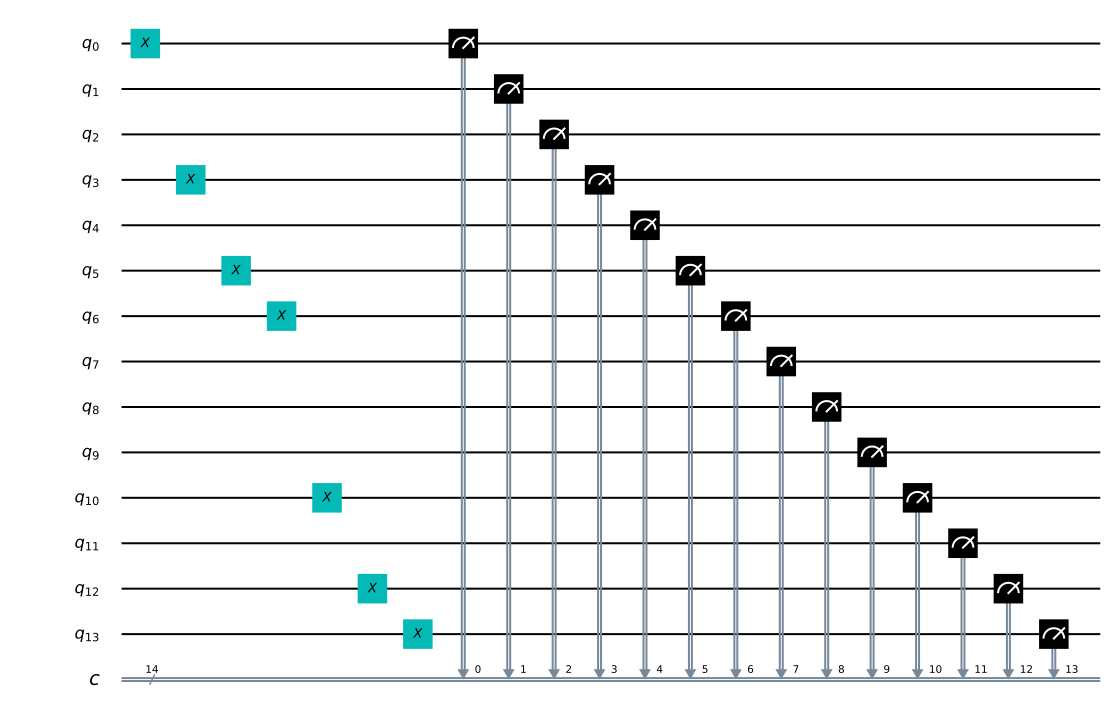

In [254]:
def str_to_bit(s):
    result = []
    for c in s:
        bits = bin(ord(c))[2:]
        bits = ' '[len(bits):] + bits
        result.extend([int(b) for b in bits])
    return result

# input text
text = 'hi'

# convert to bit
bit_array = np.array(str_to_bit(text))
print("The text:", text, "represented in bit:", bit_array)

# reverse/flip order of bit to represent qubit
qbit_array = np.flip(bit_array)

# trace for ones 1 in the qubit
qbit_loc = np.int64(np.where(qbit_array==1)[0]) 

# calculate number of bits
n = len(qbit_array)

# create encoder (NOT gate) circuit
qc_encode = QuantumCircuit(n)

for j in range(len(qbit_loc)):
  qc_encode.x(qbit_loc[j])

# create measurement circuit
n_q = n # number of qubits in the circuit
n_b = n # number of output bits we will extract from the circuit at the end
qc_output = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_output.measure(j,j)

# add measurement circuit to encoder circuit
qc = qc_encode + qc_output
print("Quantum Circuit Diagram:")
qc.draw(output='mpl',justify='none')

# ***

In [0]:
text = "hello"
a = ' '.join(format(ord(x), 'b') for x in st)
a
# # convert to bit
# bit_array = np.array([int(d) for d in str(bin(x))[2:]])
# bit_array
# # print("Number", x, "is represented in", len(bit_array),"bit:", bit_array)

'1101000 1100101 1101100 1101100 1101111 100000 1110111 1101111 1110010 1101100 1100100'

In [0]:
def frombits(bits):
    chars = []
    for b in range(len(bits) / 8):
        byte = bits[b*8:(b+1)*8]
        chars.append(chr(int(''.join([str(bit) for bit in byte]), 2)))
    return ''.join(chars)